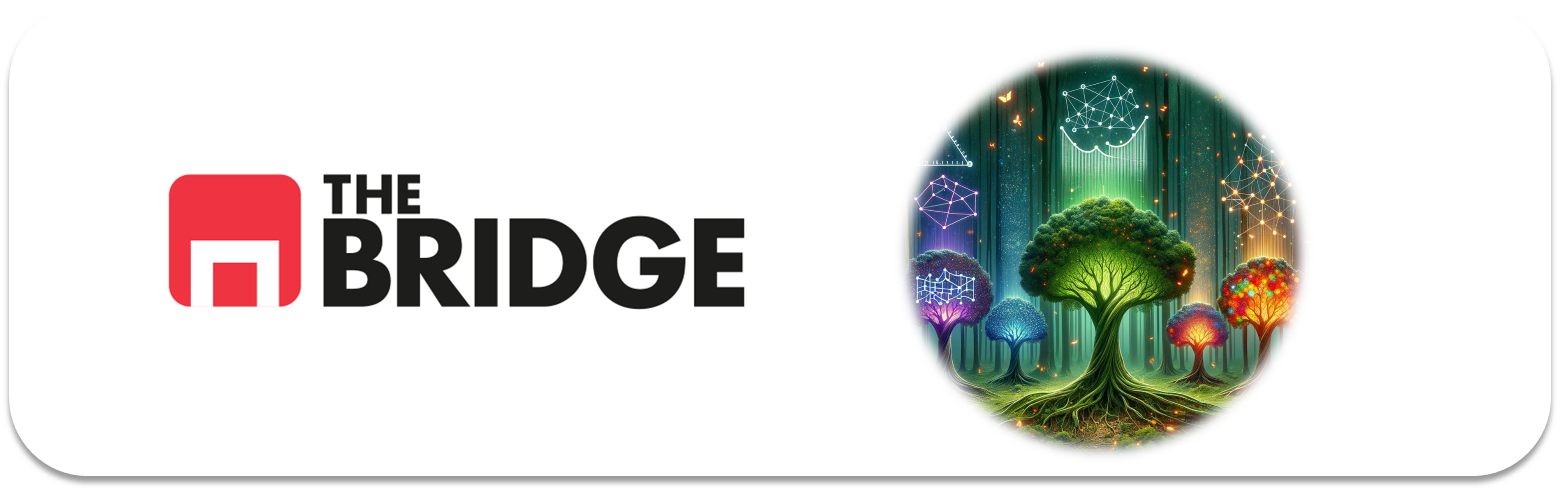

## PRACTICA OBLIGATORIA: **Arboles de Decisión y Ajuste de Hiperparámetros**

* La práctica obligatoria de esta unidad consiste en encontrar el mejor modelo para resolver un problema de predicción de si los destinatarios de una campaña de marketing adquirirán un producto concreto. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

### Descripción

En el directorio data encontrarás un dataset que contiene datos relacionados con campañas de marketing directo de una institución bancaria portuguesa (es el dataset "Bank Marketing" de la UCI Machine Learning Repository). Los datos se recopilaron de campañas de marketing telefónico, donde el objetivo principal era predecir si el cliente se suscribiría a un depósito a plazo.

La práctica consiste en completar el proceso de creación de un modelo basado en árboles de decisión que permita predecir si un cliente (dadas unas características similares a las del dataset) "comprará" el depósito a plazo. Sigue los pasos necesarios de un proceso de ML para crear el modelo, optimizar sus hiperparámetros, comparar los resultados de esa optimización con una regresión logística (sin optimizar, con sus hiperparámetros por defecto) y finalmente evaluarlo contra test y hacer una pequeña valoración del resultado obtenido.

Tendrás que hacer la limpieza, split, minieda, selección, tratamiento, primeros entrenamientos, optimización, comparación y evaluación según tu mejor criterio. Eso sí, es obligatorio:
- Identificar el target y analizar su distribución
- Realizar una optimización de hiperparámetros, escogiendo un grid medianemante razonado
- Comparar con el modelo baseline
- Evaluar contra test

AYUDA: La dirección del banco nos proporciona estas notas (en inglés):

 
   **bank client data:**  
   1 - age (numeric)  
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services")   
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)  
   4 - education (categorical: "unknown","secondary","primary","tertiary")  
   5 - default: has credit in default? (binary: "yes","no")  
   6 - balance: average yearly balance, in euros (numeric)   
   7 - housing: has housing loan? (binary: "yes","no")  
   8 - loan: has personal loan? (binary: "yes","no")   

   **related with the last contact of the current campaign:**  
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular")   
  10 - day: last contact day of the month (numeric)  
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")  
  12 - duration: last contact duration, in seconds (numeric)    

   **other attributes:**  
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)  
  15 - previous: number of contacts performed before this campaign and for this client (numeric)  
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  

In [3]:
# Cargar el dataset Bank Marketing desde UCI
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.preprocessing import LabelEncoder
url = "https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv"

df = pd.read_csv(url)

print(f"Dataset cargado: {df.shape[0]} filas y {df.shape[1]} columnas")
df.head()

Dataset cargado: 41188 filas y 21 columnas


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

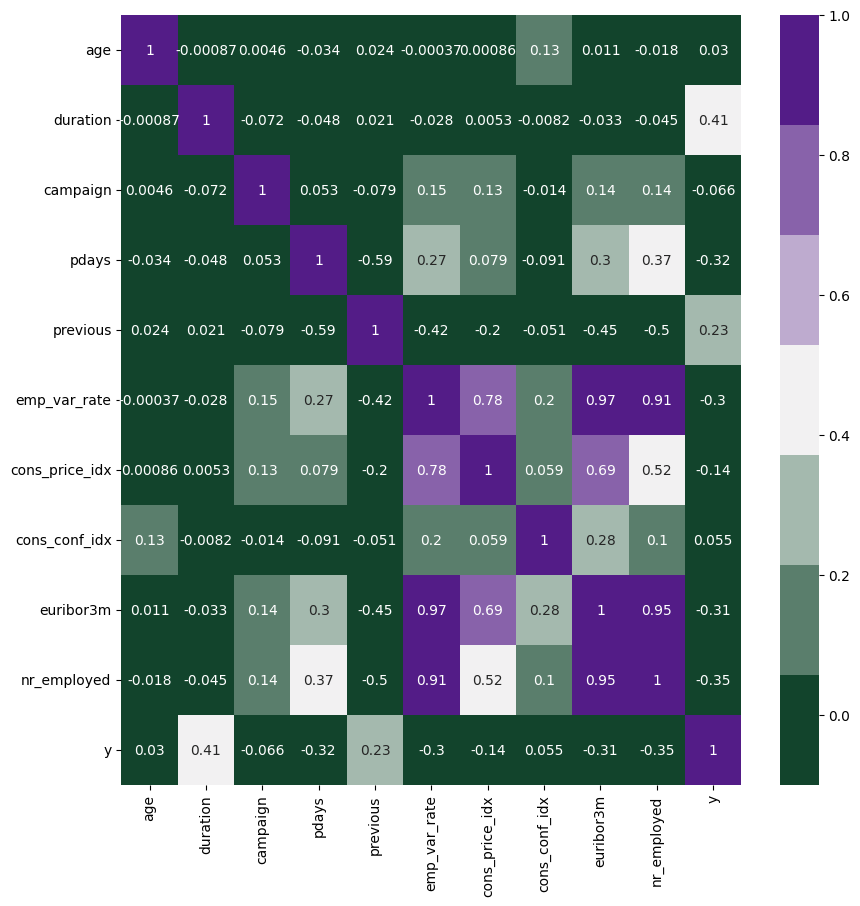

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
#Ver la distribución de los datos
print(df.info())
print(df.describe())
# Separar numéricas y categóricas
numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categoricas = df.select_dtypes(include=['object']).columns.tolist()
print(f"Variables numéricas ({len(numericas)}): {numericas}")
print(f"\nVariables categóricas ({len(categoricas)}): {categoricas}")

#Hacer correlación de las numéricas con el target
plt.figure(figsize=(10,10))
sns.heatmap(df[numericas].corr(),
           vmin=-0.1,
           vmax=1,
           cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
           annot=True);
#Eliminamos las numéricas con baja correlación
numericas.remove("age")
numericas.remove("cons_price_idx")
numericas.remove("cons_conf_idx")
numericas.remove("campaign")
print(f"Numéricas restantes: {numericas}")
print(df[numericas])
# Si quieres eliminar del DataFrame original
df = df.drop(["age", "cons_price_idx", "cons_conf_idx", "campaign"], axis=1)

In [27]:
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   job           41188 non-null  object 
 1   marital       41188 non-null  object 
 2   education     41188 non-null  object 
 3   default       41188 non-null  object 
 4   housing       41188 non-null  object 
 5   loan          41188 non-null  object 
 6   contact       41188 non-null  object 
 7   month         41188 non-null  object 
 8   day_of_week   41188 non-null  object 
 9   duration      41188 non-null  int64  
 10  pdays         41188 non-null  int64  
 11  previous      41188 non-null  int64  
 12  poutcome      41188 non-null  object 
 13  emp_var_rate  41188 non-null  float64
 14  euribor3m     41188 non-null  float64
 15  nr_employed   41188 non-null  float64
 16  y             41188 non-null  int64  
dtypes: float64(3), int64(4), object(10)
memory usage: 5.3+ MB


,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,pdays,previous,poutcome,emp_var_rate,euribor3m,nr_employed,y
0,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,999,0,nonexistent,1.4,4.963,5228.1,0
1,technician,married,unknown,no,no,no,cellular,nov,fri,138,999,0,nonexistent,-0.1,4.021,5195.8,0
2,management,single,university.degree,no,yes,no,cellular,jun,thu,339,6,2,success,-1.7,0.729,4991.6,1
3,services,married,high.school,no,no,no,cellular,apr,fri,185,999,0,nonexistent,-1.8,1.405,5099.1,0
4,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,3,1,success,-2.9,0.869,5076.2,1
5,management,divorced,basic.4y,no,yes,no,cellular,jul,tue,68,999,0,nonexistent,1.4,4.961,5228.1,0
6,blue-collar,married,basic.4y,no,yes,no,cellular,may,thu,204,999,0,nonexistent,-1.8,1.327,5099.1,0
7,blue-collar,divorced,basic.9y,no,yes,no,cellular,may,fri,191,999,0,nonexistent,-1.8,1.313,5099.1,0
8,admin.,married,university.degree,no,no,no,cellular,jun,mon,174,3,1,success,-2.9,1.266,5076.2,1
9,blue-collar,single,basic.4y,no,yes,no,cellular,apr,thu,191,999,1,failure,-1.8,1.410,5099.1,0


In [32]:
df["job"].value_counts()
#Tratamiento especial con job porque hay muchas variables, vamos a mapear para reducir los valores y agruparlos por categorías
# Crear el mapeo
job_mapping = {
    'admin.': 'office',
    'management': 'office',
    'entrepreneur': 'office',
    'self-employed': 'office',
    'technician': 'office',
    'blue-collar': 'services',
    'services': 'services',
    'housemaid': 'services',
    'retired': 'inactive',
    'unemployed': 'inactive',
    'student': 'inactive'
}

# Aplicar el mapeo
df['job'] = df['job'].map(job_mapping)

# Eliminar los unknown (quedan como NaN después del map)
df = df.dropna(subset=['job'])

print(f"Valores únicos en job: {df['job'].unique()}")
print(f"Nuevas dimensiones: {df.shape}")

#Ahora ya mapeamos con numéricas
job_numeric = {
    'office': 1,
    'services': 2,
    'inactive': 3
}

df['job'] = df['job'].map(job_numeric)

print(df['job'].value_counts())


Valores únicos en job: ['services']
Nuevas dimensiones: (14283, 17)
job
2    14283
Name: count, dtype: int64


In [33]:
df.head(10)

,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,pdays,previous,poutcome,emp_var_rate,euribor3m,nr_employed,y
0,2,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,999,0,nonexistent,1.4,4.963,5228.1,0
3,2,married,high.school,no,no,no,cellular,apr,fri,185,999,0,nonexistent,-1.8,1.405,5099.1,0
6,2,married,basic.4y,no,yes,no,cellular,may,thu,204,999,0,nonexistent,-1.8,1.327,5099.1,0
7,2,divorced,basic.9y,no,yes,no,cellular,may,fri,191,999,0,nonexistent,-1.8,1.313,5099.1,0
9,2,single,basic.4y,no,yes,no,cellular,apr,thu,191,999,1,failure,-1.8,1.410,5099.1,0
10,2,single,university.degree,no,no,no,telephone,may,fri,62,999,0,nonexistent,1.1,4.864,5191.0,0
13,2,divorced,high.school,no,yes,no,cellular,may,tue,75,999,0,nonexistent,-1.8,1.291,5099.1,0
15,2,married,high.school,unknown,yes,no,cellular,jul,thu,117,999,0,nonexistent,1.4,4.962,5228.1,0
16,2,married,high.school,no,no,no,cellular,apr,thu,1034,999,0,nonexistent,-1.8,1.365,5099.1,1
18,2,married,basic.9y,unknown,no,no,telephone,may,thu,140,999,0,nonexistent,1.1,4.860,5191.0,0


In [36]:
# Ver valores actuales
print(df['job'].value_counts())

# Recargar el dataset completo
url = "https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv"

df = pd.read_csv(url)

# Ahora sí hacer el mapeo correctamente
job_mapping = {
    'admin.': 'office',
    'management': 'office',
    'entrepreneur': 'office',
    'self-employed': 'office',
    'technician': 'office',
    'blue-collar': 'services',
    'services': 'services',
    'housemaid': 'services',
    'retired': 'inactive',
    'unemployed': 'inactive',
    'student': 'inactive'
}

df['job'] = df['job'].map(job_mapping)
df = df.dropna(subset=['job'])

print(df['job'].value_counts())

job
2    14283
Name: count, dtype: int64
job
office      22966
services    14283
inactive     3609
Name: count, dtype: int64


In [37]:
job_numeric = {
    'office': 1,
    'services': 2,
    'inactive': 3
}

df['job'] = df['job'].map(job_numeric)

print(df['job'].value_counts())

job
1    22966
2    14283
3     3609
Name: count, dtype: int64


In [38]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,2,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,1,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,1,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,2,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,3,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40858 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             40858 non-null  int64  
 1   job             40858 non-null  int64  
 2   marital         40858 non-null  object 
 3   education       40858 non-null  object 
 4   default         40858 non-null  object 
 5   housing         40858 non-null  object 
 6   loan            40858 non-null  object 
 7   contact         40858 non-null  object 
 8   month           40858 non-null  object 
 9   day_of_week     40858 non-null  object 
 10  duration        40858 non-null  int64  
 11  campaign        40858 non-null  int64  
 12  pdays           40858 non-null  int64  
 13  previous        40858 non-null  int64  
 14  poutcome        40858 non-null  object 
 15  emp_var_rate    40858 non-null  float64
 16  cons_price_idx  40858 non-null  float64
 17  cons_conf_idx   40858 non-null  floa

In [41]:
df["education"].value_counts()
education_mapping = {
    'university.degree': 'professional',
    'professional.course': 'professional',
    'high.school': 'professional',
    'basic.9y': 'basic',
    'basic.6y': 'basic',
    'basic.4y': 'basic',
    'illiterate': 'basic'
}

df['education'] = df['education'].map(education_mapping)

# Eliminar unknown
df = df.dropna(subset=['education'])

# VERIFICAR
print(df['education'].value_counts())



education
professional    26832
basic           12426
Name: count, dtype: int64


In [42]:
# Luego mapeo numérico
education_numeric = {
    'professional': 1,
    'basic': 2
}

df['education'] = df['education'].map(education_numeric)

print(df['education'].value_counts())

education
1    26832
2    12426
Name: count, dtype: int64


In [45]:
#Deberíamos haber hecho antes, mirar la correlación de las categóricas con el target
from scipy.stats import chi2_contingency

for col in categoricas:
    chi2, p_value, _, _ = chi2_contingency(pd.crosstab(df[col], df['y']))
    print(f"{col:15} | p-value: {p_value:.6f} | {'✓ Relevante' if p_value < 0.05 else '✗ No relevante'}")

df = df.drop(['housing', 'loan'], axis=1)
print(f"Nuevas dimensiones: {df.shape}")

job             | p-value: 0.000000 | ✓ Relevante
marital         | p-value: 0.000000 | ✓ Relevante
education       | p-value: 0.000000 | ✓ Relevante
default         | p-value: 0.000000 | ✓ Relevante
housing         | p-value: 0.147420 | ✗ No relevante
loan            | p-value: 0.486668 | ✗ No relevante
contact         | p-value: 0.000000 | ✓ Relevante
month           | p-value: 0.000000 | ✓ Relevante
day_of_week     | p-value: 0.000077 | ✓ Relevante
poutcome        | p-value: 0.000000 | ✓ Relevante
Nuevas dimensiones: (39258, 19)


In [47]:
df["marital"].value_counts()

marital
married     23748
single      11026
divorced     4417
unknown        67
Name: count, dtype: int64

In [51]:
# Eliminar filas donde marital sea "unknown"
df = df[df['marital'] != 'unknown']

# VERIFICAR
print(df['marital'].value_counts())

marital
married     23748
single      11026
divorced     4417
Name: count, dtype: int64


In [52]:
# Desde donde estamos (ya has hecho job, education y eliminado housing/loan)

# 1. ELIMINAR "unknown" de las que faltan
df = df[df['marital'] != 'unknown']
df = df[df['default'] != 'unknown']

print(f"Dimensiones después de limpiar unknown: {df.shape}")

# 2. MAPEOS PARA marital
marital_numeric = {
    'married': 1,
    'single': 2,
    'divorced': 3
}
df['marital'] = df['marital'].map(marital_numeric)
print("✓ marital convertido")

# 3. MAPEOS PARA default
default_numeric = {
    'no': 0,
    'yes': 1
}
df['default'] = df['default'].map(default_numeric)
print("✓ default convertido")

# 4. MAPEOS PARA contact
contact_numeric = {
    'cellular': 1,
    'telephone': 2
}
df['contact'] = df['contact'].map(contact_numeric)
print("✓ contact convertido")

# 5. MAPEOS PARA month
month_numeric = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}
df['month'] = df['month'].map(month_numeric)
print("✓ month convertido")

# 6. MAPEOS PARA day_of_week
day_numeric = {
    'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5
}
df['day_of_week'] = df['day_of_week'].map(day_numeric)
print("✓ day_of_week convertido")

# 7. MAPEOS PARA poutcome
poutcome_numeric = {
    'nonexistent': 0,
    'failure': 1,
    'success': 2
}
df['poutcome'] = df['poutcome'].map(poutcome_numeric)
print("✓ poutcome convertido")

# 8. MAPEOS PARA y (TARGET)
y_numeric = {
    'no': 0,
    'yes': 1
}
df['y'] = df['y'].map(y_numeric)
print("✓ y (target) convertido")

# VERIFICACIÓN FINAL
print("\n" + "="*60)
print("VERIFICACIÓN FINAL")
print("="*60)
print(df.info())
print("\nPrimeras filas:")
print(df.head())

Dimensiones después de limpiar unknown: (31227, 19)
✓ marital convertido
✓ default convertido
✓ contact convertido
✓ month convertido
✓ day_of_week convertido
✓ poutcome convertido
✓ y (target) convertido

VERIFICACIÓN FINAL
<class 'pandas.core.frame.DataFrame'>
Index: 31227 entries, 2 to 41187
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             31227 non-null  int64  
 1   job             31227 non-null  int64  
 2   marital         31227 non-null  int64  
 3   education       31227 non-null  int64  
 4   default         31227 non-null  int64  
 5   contact         31227 non-null  int64  
 6   month           31227 non-null  int64  
 7   day_of_week     31227 non-null  int64  
 8   duration        31227 non-null  int64  
 9   campaign        31227 non-null  int64  
 10  pdays           31227 non-null  int64  
 11  previous        31227 non-null  int64  
 12  poutcome        31227 non-null  int6

In [56]:
# Recargar y desde el dataset original

url = "https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv"
df_temp= pd.read_csv(url, sep = ";")
# Asignar y de nuevo (solo las filas que tienes)
df['y'] = df_temp['y'].iloc[df.index].map({'no': 0, 'yes': 1})

# Verificar
print(df['y'].value_counts())
print(df.info())

KeyError: 'y'

In [57]:
# El problema es que df_temp ya no tiene 'y' en esas posiciones
# Necesitas hacer merge por el índice original

# Resetear índice para poder hacer merge
df_temp = pd.read_csv(url, sep=';')
df_temp['original_index'] = df_temp.index

# Agregar el índice original a tu df también
df['original_index'] = df.index

# Hacer merge
df = df.drop('y', axis=1)  # Eliminar la y corrupta
df = df.merge(df_temp[['original_index', 'y']], on='original_index', how='left')
df = df.drop('original_index', axis=1)

# Convertir y a numérico
df['y'] = df['y'].map({'no': 0, 'yes': 1})

# Verificar
print(df['y'].value_counts())

KeyError: "['y'] not in index"

In [ ]:
df.info()
url = "https://raw.githubusercontent.com/surtantheta/Bank_Marketing_Dataset_Machine_Learning_Project/master/bank-additional-full.csv"
df_temp = pd.read_csv(url, sep=';')

<class 'pandas.core.frame.DataFrame'>
Index: 31227 entries, 2 to 41187
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             31227 non-null  int64  
 1   job             31227 non-null  int64  
 2   marital         31227 non-null  int64  
 3   education       31227 non-null  int64  
 4   default         31227 non-null  int64  
 5   contact         31227 non-null  int64  
 6   month           31227 non-null  int64  
 7   day_of_week     31227 non-null  int64  
 8   duration        31227 non-null  int64  
 9   campaign        31227 non-null  int64  
 10  pdays           31227 non-null  int64  
 11  previous        31227 non-null  int64  
 12  poutcome        31227 non-null  int64  
 13  emp_var_rate    31227 non-null  float64
 14  cons_price_idx  31227 non-null  float64
 15  cons_conf_idx   31227 non-null  float64
 16  euribor3m       31227 non-null  float64
 17  nr_employed     31227 non-null  floa

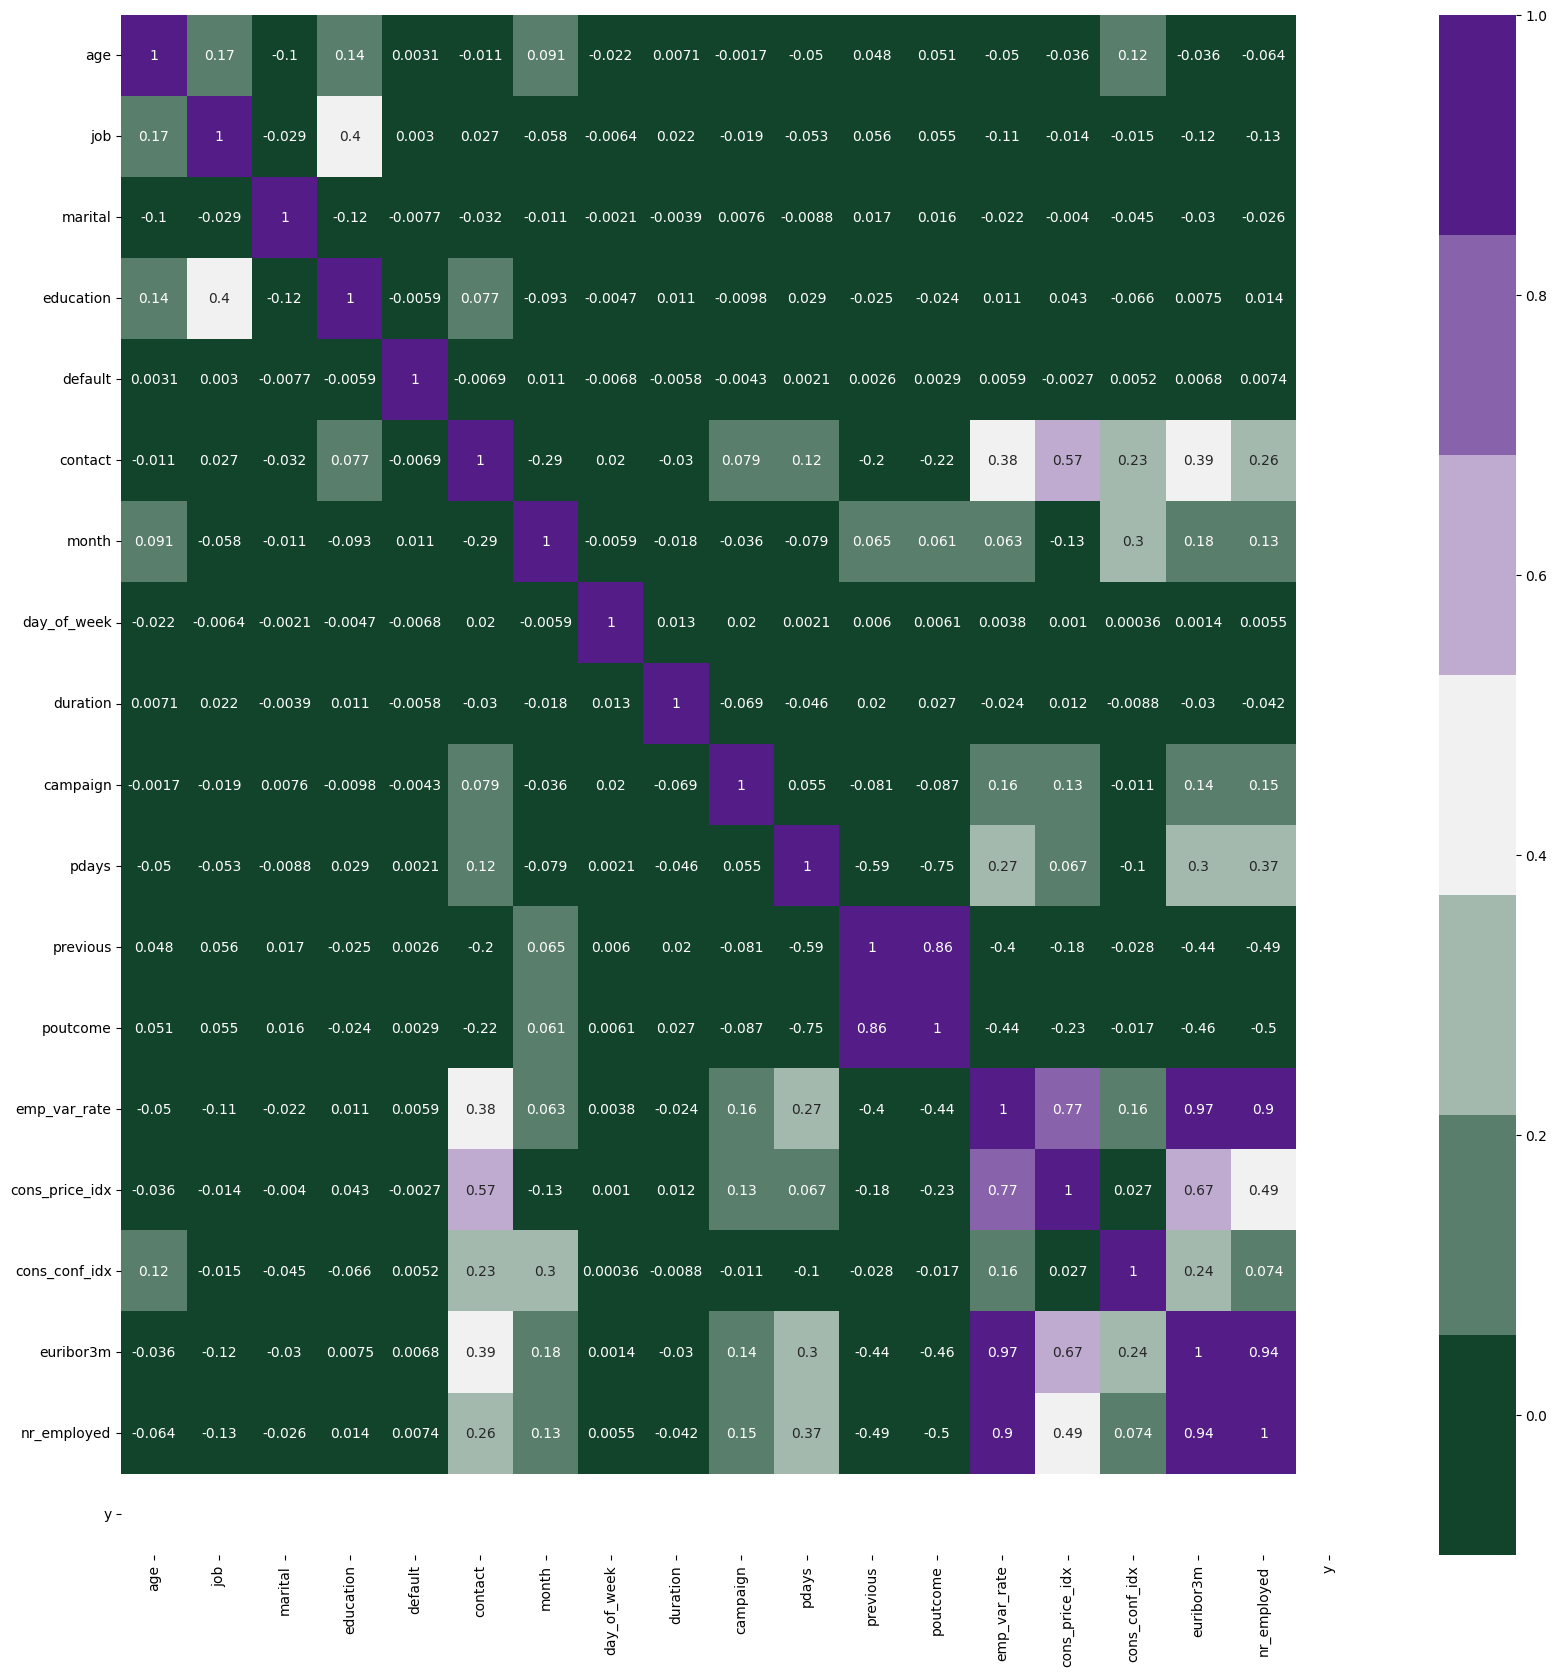

In [55]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),
           vmin=-0.1,
           vmax=1,
           cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
           annot=True);

In [59]:
# ============================================
# CARGA DE DATOS
# ============================================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency


url = "https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv"
df= pd.read_csv(url)
print(f"✓ Dataset cargado: {df.shape[0]} filas y {df.shape[1]} columnas")

# ============================================
# 1. ELIMINAR COLUMNAS POCO CORRELACIONADAS (NUMÉRICAS)
# ============================================
df = df.drop(['age', 'cons_price_idx', 'cons_conf_idx', 'campaign'], axis=1)
print(f"✓ Columnas numéricas poco relevantes eliminadas")

# ============================================
# 2. ANÁLISIS CHI-CUADRADO PARA CATEGÓRICAS
# ============================================
categoricas = ['job', 'marital', 'education', 'default', 'housing', 'loan', 
               'contact', 'month', 'day_of_week', 'poutcome']

print("\n" + "="*60)
print("TEST CHI-CUADRADO: Relación con target 'y'")
print("="*60)

for col in categoricas:
    chi2, p_value, _, _ = chi2_contingency(pd.crosstab(df[col], df['y']))
    print(f"{col:15} | p-value: {p_value:.6f} | {'✓ Relevante' if p_value < 0.05 else '✗ No relevante'}")

# ============================================
# 3. ELIMINAR CATEGÓRICAS NO RELEVANTES
# ============================================
df = df.drop(['housing', 'loan'], axis=1)
print(f"\n✓ Categóricas no relevantes eliminadas (housing, loan)")

# ============================================
# 4. ELIMINAR "unknown"
# ============================================
df = df[df['job'] != 'unknown']
df = df[df['marital'] != 'unknown']
df = df[df['education'] != 'unknown']
df = df[df['default'] != 'unknown']

print(f"✓ Filas con 'unknown' eliminadas. Dimensiones: {df.shape}")

# ============================================
# 5. CONVERTIR CATEGÓRICAS A NUMÉRICAS
# ============================================

# 5.1 JOB (agrupado)
job_mapping = {
    'admin.': 'office',
    'management': 'office',
    'entrepreneur': 'office',
    'self-employed': 'office',
    'technician': 'office',
    'blue-collar': 'services',
    'services': 'services',
    'housemaid': 'services',
    'retired': 'inactive',
    'unemployed': 'inactive',
    'student': 'inactive'
}
df['job'] = df['job'].map(job_mapping)

job_numeric = {'office': 1, 'services': 2, 'inactive': 3}
df['job'] = df['job'].map(job_numeric)
print("✓ job convertido")

# 5.2 EDUCATION (agrupado)
education_mapping = {
    'university.degree': 'professional',
    'professional.course': 'professional',
    'high.school': 'professional',
    'basic.9y': 'basic',
    'basic.6y': 'basic',
    'basic.4y': 'basic',
    'illiterate': 'basic'
}
df['education'] = df['education'].map(education_mapping)

education_numeric = {'professional': 1, 'basic': 2}
df['education'] = df['education'].map(education_numeric)
print("✓ education convertido")

# 5.3 MARITAL
marital_numeric = {'married': 1, 'single': 2, 'divorced': 3}
df['marital'] = df['marital'].map(marital_numeric)
print("✓ marital convertido")

# 5.4 DEFAULT
default_numeric = {'no': 0, 'yes': 1}
df['default'] = df['default'].map(default_numeric)
print("✓ default convertido")

# 5.5 CONTACT
contact_numeric = {'cellular': 1, 'telephone': 2}
df['contact'] = df['contact'].map(contact_numeric)
print("✓ contact convertido")

# 5.6 MONTH
month_numeric = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}
df['month'] = df['month'].map(month_numeric)
print("✓ month convertido")

# 5.7 DAY_OF_WEEK
day_numeric = {'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5}
df['day_of_week'] = df['day_of_week'].map(day_numeric)
print("✓ day_of_week convertido")

# 5.8 POUTCOME
poutcome_numeric = {'nonexistent': 0, 'failure': 1, 'success': 2}
df['poutcome'] = df['poutcome'].map(poutcome_numeric)
print("✓ poutcome convertido")

# 5.9 Y (TARGET)
y_numeric = {'no': 0, 'yes': 1}
df['y'] = df['y'].map(y_numeric)
print("✓ y (target) convertido")

# ============================================
# 6. VERIFICACIÓN FINAL
# ============================================
print("\n" + "="*60)
print("DATASET FINAL PREPARADO")
print("="*60)
print(df.info())
print("\nDistribución del target 'y':")
print(df['y'].value_counts())
print("\nPrimeras filas:")
print(df.head())

# ============================================
# 7. CORRELACIÓN CON TARGET
# ============================================
print("\n" + "="*60)
print("CORRELACIÓN CON TARGET 'y'")
print("="*60)
correlaciones = df.corr()['y'].sort_values(ascending=False)
print(correlaciones)

✓ Dataset cargado: 41188 filas y 21 columnas
✓ Columnas numéricas poco relevantes eliminadas

TEST CHI-CUADRADO: Relación con target 'y'
job             | p-value: 0.000000 | ✓ Relevante
marital         | p-value: 0.000000 | ✓ Relevante
education       | p-value: 0.000000 | ✓ Relevante
default         | p-value: 0.000000 | ✓ Relevante
housing         | p-value: 0.058294 | ✗ No relevante
loan            | p-value: 0.578675 | ✗ No relevante
contact         | p-value: 0.000000 | ✓ Relevante
month           | p-value: 0.000000 | ✓ Relevante
day_of_week     | p-value: 0.000030 | ✓ Relevante
poutcome        | p-value: 0.000000 | ✓ Relevante

✓ Categóricas no relevantes eliminadas (housing, loan)
✓ Filas con 'unknown' eliminadas. Dimensiones: (31227, 15)
✓ job convertido
✓ education convertido
✓ marital convertido
✓ default convertido
✓ contact convertido
✓ month convertido
✓ day_of_week convertido
✓ poutcome convertido
✓ y (target) convertido

DATASET FINAL PREPARADO
<class 'pandas.core.fram

In [ ]:
# ============================================
# CARGA DE DATOS
# ============================================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

url = "https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv"
df = pd.read_csv(url)

print(f"✓ Dataset cargado: {df.shape[0]} filas y {df.shape[1]} columnas")
print("\nColumnas del dataset:")
print(df.columns.tolist())
print("\nPrimeras filas:")
print(df.head())

In [61]:
url = "https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv"
df = pd.read_csv(url)
print(df.columns.tolist())
print(df['y'].value_counts())

['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']
y
0    36548
1     4640
Name: count, dtype: int64


In [62]:


# ============================================
# 1. SEPARAR NUMÉRICAS Y CATEGÓRICAS
# ============================================
numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categoricas = df.select_dtypes(include=['object']).columns.tolist()

print(f"\n✓ Numéricas ({len(numericas)}): {numericas}")
print(f"✓ Categóricas ({len(categoricas)}): {categoricas}")

# ============================================
# 2. CORRELACIÓN DE NUMÉRICAS CON TARGET
# ============================================
print("\n" + "="*60)
print("CORRELACIÓN NUMÉRICAS CON TARGET 'y'")
print("="*60)
correlaciones = df[numericas].corr()['y'].sort_values(ascending=False)
print(correlaciones)

# Eliminar numéricas con baja correlación (< 0.1)
numericas_eliminar = correlaciones[abs(correlaciones) < 0.1].index.tolist()
numericas_eliminar.remove('y')  # No eliminar el target
print(f"\n✓ Numéricas a eliminar (correlación < 0.1): {numericas_eliminar}")

df = df.drop(numericas_eliminar, axis=1)
print(f"✓ Dimensiones después de eliminar numéricas: {df.shape}")

# ============================================
# 3. CHI-CUADRADO PARA CATEGÓRICAS
# ============================================
print("\n" + "="*60)
print("TEST CHI-CUADRADO PARA CATEGÓRICAS")
print("="*60)

categoricas_relevantes = []
categoricas_eliminar = []

for col in categoricas:
    chi2, p_value, _, _ = chi2_contingency(pd.crosstab(df[col], df['y']))
    relevante = p_value < 0.05
    print(f"{col:15} | p-value: {p_value:.6f} | {'✓ Relevante' if relevante else '✗ No relevante'}")
    
    if relevante:
        categoricas_relevantes.append(col)
    else:
        categoricas_eliminar.append(col)

# Eliminar categóricas no relevantes
df = df.drop(categoricas_eliminar, axis=1)
print(f"\n✓ Categóricas eliminadas: {categoricas_eliminar}")
print(f"✓ Dimensiones: {df.shape}")

# ============================================
# 4. ELIMINAR "unknown" DE CATEGÓRICAS
# ============================================
print("\n" + "="*60)
print("ELIMINANDO 'unknown'")
print("="*60)

for col in categoricas_relevantes:
    filas_antes = len(df)
    df = df[df[col] != 'unknown']
    filas_eliminadas = filas_antes - len(df)
    if filas_eliminadas > 0:
        print(f"✓ {col}: {filas_eliminadas} filas eliminadas")

# RESETEAR ÍNDICE (CRÍTICO)
df = df.reset_index(drop=True)
print(f"\n✓ Índice reseteado. Dimensiones finales: {df.shape}")

# Verificar y ANTES de convertir
print(f"✓ Verificación y: {df['y'].value_counts().to_dict()}")

# ============================================
# 5. CONVERTIR CATEGÓRICAS A NUMÉRICAS
# ============================================
print("\n" + "="*60)
print("CONVIRTIENDO CATEGÓRICAS A NUMÉRICAS")
print("="*60)

# 5.1 JOB (si existe y es relevante)
if 'job' in categoricas_relevantes:
    print(f"\nValores en job: {df['job'].unique()}")
    job_mapping_1 = {
        'admin.': 'office', 'management': 'office', 'entrepreneur': 'office',
        'self-employed': 'office', 'technician': 'office',
        'blue-collar': 'services', 'services': 'services', 'housemaid': 'services',
        'retired': 'inactive', 'unemployed': 'inactive', 'student': 'inactive'
    }
    df['job'] = df['job'].map(job_mapping_1)
    job_mapping_2 = {'office': 1, 'services': 2, 'inactive': 3}
    df['job'] = df['job'].map(job_mapping_2)
    print(f"✓ job convertido: {df['job'].value_counts().to_dict()}")

# 5.2 EDUCATION (si existe y es relevante)
if 'education' in categoricas_relevantes:
    print(f"\nValores en education: {df['education'].unique()}")
    edu_mapping_1 = {
        'university.degree': 'professional', 'professional.course': 'professional',
        'high.school': 'professional', 'basic.9y': 'basic', 'basic.6y': 'basic',
        'basic.4y': 'basic', 'illiterate': 'basic'
    }
    df['education'] = df['education'].map(edu_mapping_1)
    edu_mapping_2 = {'professional': 1, 'basic': 2}
    df['education'] = df['education'].map(edu_mapping_2)
    print(f"✓ education convertido: {df['education'].value_counts().to_dict()}")

# 5.3 MARITAL (si existe y es relevante)
if 'marital' in categoricas_relevantes:
    marital_map = {'married': 1, 'single': 2, 'divorced': 3}
    df['marital'] = df['marital'].map(marital_map)
    print(f"✓ marital convertido: {df['marital'].value_counts().to_dict()}")

# 5.4 DEFAULT (si existe y es relevante)
if 'default' in categoricas_relevantes:
    default_map = {'no': 0, 'yes': 1}
    df['default'] = df['default'].map(default_map)
    print(f"✓ default convertido: {df['default'].value_counts().to_dict()}")

# 5.5 CONTACT (si existe y es relevante)
if 'contact' in categoricas_relevantes:
    contact_map = {'cellular': 1, 'telephone': 2}
    df['contact'] = df['contact'].map(contact_map)
    print(f"✓ contact convertido: {df['contact'].value_counts().to_dict()}")

# 5.6 MONTH (si existe y es relevante)
if 'month' in categoricas_relevantes:
    month_map = {
        'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
        'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
    }
    df['month'] = df['month'].map(month_map)
    print(f"✓ month convertido")

# 5.7 DAY_OF_WEEK (si existe y es relevante)
if 'day_of_week' in categoricas_relevantes:
    day_map = {'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5}
    df['day_of_week'] = df['day_of_week'].map(day_map)
    print(f"✓ day_of_week convertido")

# 5.8 POUTCOME (si existe y es relevante)
if 'poutcome' in categoricas_relevantes:
    pout_map = {'nonexistent': 0, 'failure': 1, 'success': 2}
    df['poutcome'] = df['poutcome'].map(pout_map)
    print(f"✓ poutcome convertido")

# ============================================
# 6. VERIFICACIÓN FINAL
# ============================================
print("\n" + "="*60)
print("VERIFICACIÓN FINAL")
print("="*60)
print(f"✓ Dimensiones finales: {df.shape}")
print(f"✓ Target 'y': {df['y'].value_counts().to_dict()}")
print("\n✓ Info del dataset:")
print(df.info())
print("\n✓ Primeras filas:")
print(df.head())

# Correlación final con y
print("\n" + "="*60)
print("CORRELACIÓN FINAL CON TARGET")
print("="*60)
print(df.corr()['y'].sort_values(ascending=False))# ============================================
# CARGA DE DATOS
# ============================================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

url = "https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv"
df = pd.read_csv(url)

print(f"✓ Dataset cargado: {df.shape[0]} filas y {df.shape[1]} columnas")
print(f"✓ Target 'y' ya está en formato numérico")
print(df['y'].value_counts())

# ============================================
# 1. SEPARAR NUMÉRICAS Y CATEGÓRICAS
# ============================================
numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categoricas = df.select_dtypes(include=['object']).columns.tolist()

print(f"\n✓ Numéricas ({len(numericas)}): {numericas}")
print(f"✓ Categóricas ({len(categoricas)}): {categoricas}")

# ============================================
# 2. CORRELACIÓN DE NUMÉRICAS CON TARGET
# ============================================
print("\n" + "="*60)
print("CORRELACIÓN NUMÉRICAS CON TARGET 'y'")
print("="*60)
correlaciones = df[numericas].corr()['y'].sort_values(ascending=False)
print(correlaciones)

# Eliminar numéricas con baja correlación (< 0.1)
numericas_eliminar = correlaciones[abs(correlaciones) < 0.1].index.tolist()
numericas_eliminar.remove('y')  # No eliminar el target
print(f"\n✓ Numéricas a eliminar (correlación < 0.1): {numericas_eliminar}")

df = df.drop(numericas_eliminar, axis=1)
print(f"✓ Dimensiones después de eliminar numéricas: {df.shape}")

# ============================================
# 3. CHI-CUADRADO PARA CATEGÓRICAS
# ============================================
print("\n" + "="*60)
print("TEST CHI-CUADRADO PARA CATEGÓRICAS")
print("="*60)

categoricas_relevantes = []
categoricas_eliminar = []

for col in categoricas:
    chi2, p_value, _, _ = chi2_contingency(pd.crosstab(df[col], df['y']))
    relevante = p_value < 0.05
    print(f"{col:15} | p-value: {p_value:.6f} | {'✓ Relevante' if relevante else '✗ No relevante'}")
    
    if relevante:
        categoricas_relevantes.append(col)
    else:
        categoricas_eliminar.append(col)

# Eliminar categóricas no relevantes
df = df.drop(categoricas_eliminar, axis=1)
print(f"\n✓ Categóricas eliminadas: {categoricas_eliminar}")
print(f"✓ Dimensiones: {df.shape}")

# ============================================
# 4. ELIMINAR "unknown" DE CATEGÓRICAS
# ============================================
print("\n" + "="*60)
print("ELIMINANDO 'unknown'")
print("="*60)

for col in categoricas_relevantes:
    filas_antes = len(df)
    df = df[df[col] != 'unknown']
    filas_eliminadas = filas_antes - len(df)
    if filas_eliminadas > 0:
        print(f"✓ {col}: {filas_eliminadas} filas eliminadas")

# RESETEAR ÍNDICE (CRÍTICO)
df = df.reset_index(drop=True)
print(f"\n✓ Índice reseteado. Dimensiones finales: {df.shape}")

# Verificar y ANTES de convertir
print(f"✓ Verificación y: {df['y'].value_counts().to_dict()}")

# ============================================
# 5. CONVERTIR CATEGÓRICAS A NUMÉRICAS
# ============================================
print("\n" + "="*60)
print("CONVIRTIENDO CATEGÓRICAS A NUMÉRICAS")
print("="*60)

# 5.1 JOB (si existe y es relevante)
if 'job' in categoricas_relevantes:
    print(f"\nValores en job: {df['job'].unique()}")
    job_mapping_1 = {
        'admin.': 'office', 'management': 'office', 'entrepreneur': 'office',
        'self-employed': 'office', 'technician': 'office',
        'blue-collar': 'services', 'services': 'services', 'housemaid': 'services',
        'retired': 'inactive', 'unemployed': 'inactive', 'student': 'inactive'
    }
    df['job'] = df['job'].map(job_mapping_1)
    job_mapping_2 = {'office': 1, 'services': 2, 'inactive': 3}
    df['job'] = df['job'].map(job_mapping_2)
    print(f"✓ job convertido: {df['job'].value_counts().to_dict()}")

# 5.2 EDUCATION (si existe y es relevante)
if 'education' in categoricas_relevantes:
    print(f"\nValores en education: {df['education'].unique()}")
    edu_mapping_1 = {
        'university.degree': 'professional', 'professional.course': 'professional',
        'high.school': 'professional', 'basic.9y': 'basic', 'basic.6y': 'basic',
        'basic.4y': 'basic', 'illiterate': 'basic'
    }
    df['education'] = df['education'].map(edu_mapping_1)
    edu_mapping_2 = {'professional': 1, 'basic': 2}
    df['education'] = df['education'].map(edu_mapping_2)
    print(f"✓ education convertido: {df['education'].value_counts().to_dict()}")

# 5.3 MARITAL (si existe y es relevante)
if 'marital' in categoricas_relevantes:
    marital_map = {'married': 1, 'single': 2, 'divorced': 3}
    df['marital'] = df['marital'].map(marital_map)
    print(f"✓ marital convertido: {df['marital'].value_counts().to_dict()}")

# 5.4 DEFAULT (si existe y es relevante)
if 'default' in categoricas_relevantes:
    default_map = {'no': 0, 'yes': 1}
    df['default'] = df['default'].map(default_map)
    print(f"✓ default convertido: {df['default'].value_counts().to_dict()}")

# 5.5 CONTACT (si existe y es relevante)
if 'contact' in categoricas_relevantes:
    contact_map = {'cellular': 1, 'telephone': 2}
    df['contact'] = df['contact'].map(contact_map)
    print(f"✓ contact convertido: {df['contact'].value_counts().to_dict()}")

# 5.6 MONTH (si existe y es relevante)
if 'month' in categoricas_relevantes:
    month_map = {
        'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
        'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
    }
    df['month'] = df['month'].map(month_map)
    print(f"✓ month convertido")

# 5.7 DAY_OF_WEEK (si existe y es relevante)
if 'day_of_week' in categoricas_relevantes:
    day_map = {'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5}
    df['day_of_week'] = df['day_of_week'].map(day_map)
    print(f"✓ day_of_week convertido")

# 5.8 POUTCOME (si existe y es relevante)
if 'poutcome' in categoricas_relevantes:
    pout_map = {'nonexistent': 0, 'failure': 1, 'success': 2}
    df['poutcome'] = df['poutcome'].map(pout_map)
    print(f"✓ poutcome convertido")

# ============================================
# 6. VERIFICACIÓN FINAL
# ============================================
print("\n" + "="*60)
print("VERIFICACIÓN FINAL")
print("="*60)
print(f"✓ Dimensiones finales: {df.shape}")
print(f"✓ Target 'y': {df['y'].value_counts().to_dict()}")
print("\n✓ Info del dataset:")
print(df.info())
print("\n✓ Primeras filas:")
print(df.head())

# Correlación final con y
print("\n" + "="*60)
print("CORRELACIÓN FINAL CON TARGET")
print("="*60)
print(df.corr()['y'].sort_values(ascending=False))


✓ Numéricas (11): ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']
✓ Categóricas (10): ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

CORRELACIÓN NUMÉRICAS CON TARGET 'y'
y                 1.000000
duration          0.405274
previous          0.230181
cons_conf_idx     0.054878
age               0.030399
campaign         -0.066357
cons_price_idx   -0.136211
emp_var_rate     -0.298334
euribor3m        -0.307771
pdays            -0.324914
nr_employed      -0.354678
Name: y, dtype: float64


ValueError: list.remove(x): x not in list

In [64]:
# ============================================
# CARGA DE DATOS
# ============================================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

url = "https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv"
df = pd.read_csv(url)

print(f"✓ Dataset cargado: {df.shape[0]} filas y {df.shape[1]} columnas")
print(f"✓ Target 'y' ya está en formato numérico")
print(df['y'].value_counts())

# ============================================
# 1. SEPARAR NUMÉRICAS Y CATEGÓRICAS
# ============================================
numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categoricas = df.select_dtypes(include=['object']).columns.tolist()

print(f"\n✓ Numéricas ({len(numericas)}): {numericas}")
print(f"✓ Categóricas ({len(categoricas)}): {categoricas}")

# ============================================
# 2. CORRELACIÓN DE NUMÉRICAS CON TARGET
# ============================================
print("\n" + "="*60)
print("CORRELACIÓN NUMÉRICAS CON TARGET 'y'")
print("="*60)
correlaciones = df[numericas].corr()['y'].sort_values(ascending=False)
print(correlaciones)

# Eliminar numéricas con baja correlación (< 0.1)
numericas_eliminar = correlaciones[abs(correlaciones) < 0.1].index.tolist()
if 'y' in numericas_eliminar:
    numericas_eliminar.remove('y')  # No eliminar el target
print(f"\n✓ Numéricas a eliminar (correlación < 0.1): {numericas_eliminar}")

df = df.drop(numericas_eliminar, axis=1)
print(f"✓ Dimensiones después de eliminar numéricas: {df.shape}")

# ============================================
# 3. CHI-CUADRADO PARA CATEGÓRICAS
# ============================================
print("\n" + "="*60)
print("TEST CHI-CUADRADO PARA CATEGÓRICAS")
print("="*60)

categoricas_relevantes = []
categoricas_eliminar = []

for col in categoricas:
    chi2, p_value, _, _ = chi2_contingency(pd.crosstab(df[col], df['y']))
    relevante = p_value < 0.05
    print(f"{col:15} | p-value: {p_value:.6f} | {'✓ Relevante' if relevante else '✗ No relevante'}")
    
    if relevante:
        categoricas_relevantes.append(col)
    else:
        categoricas_eliminar.append(col)

# Eliminar categóricas no relevantes
df = df.drop(categoricas_eliminar, axis=1)
print(f"\n✓ Categóricas eliminadas: {categoricas_eliminar}")
print(f"✓ Dimensiones: {df.shape}")

# ============================================
# 4. ELIMINAR "unknown" DE CATEGÓRICAS
# ============================================
print("\n" + "="*60)
print("ELIMINANDO 'unknown'")
print("="*60)

for col in categoricas_relevantes:
    filas_antes = len(df)
    df = df[df[col] != 'unknown']
    filas_eliminadas = filas_antes - len(df)
    if filas_eliminadas > 0:
        print(f"✓ {col}: {filas_eliminadas} filas eliminadas")

# RESETEAR ÍNDICE (CRÍTICO)
df = df.reset_index(drop=True)
print(f"\n✓ Índice reseteado. Dimensiones finales: {df.shape}")

# Verificar y ANTES de convertir
print(f"✓ Verificación y ANTES de convertir: {df['y'].value_counts().to_dict()}")

# ============================================
# 5. CONVERTIR CATEGÓRICAS A NUMÉRICAS
# ============================================
print("\n" + "="*60)
print("CONVIRTIENDO CATEGÓRICAS A NUMÉRICAS")
print("="*60)

# 5.1 JOB (si existe y es relevante)
if 'job' in categoricas_relevantes:
    print(f"\nValores en job: {df['job'].unique()}")
    job_mapping_1 = {
        'admin.': 'office', 'management': 'office', 'entrepreneur': 'office',
        'self-employed': 'office', 'technician': 'office',
        'blue-collar': 'services', 'services': 'services', 'housemaid': 'services',
        'retired': 'inactive', 'unemployed': 'inactive', 'student': 'inactive'
    }
    df['job'] = df['job'].map(job_mapping_1)
    print(f"Después del primer mapeo: {df['job'].value_counts().to_dict()}")
    
    job_mapping_2 = {'office': 1, 'services': 2, 'inactive': 3}
    df['job'] = df['job'].map(job_mapping_2)
    print(f"✓ job convertido: {df['job'].value_counts().to_dict()}")

# 5.2 EDUCATION (si existe y es relevante)
if 'education' in categoricas_relevantes:
    print(f"\nValores en education: {df['education'].unique()}")
    edu_mapping_1 = {
        'university.degree': 'professional', 'professional.course': 'professional',
        'high.school': 'professional', 'basic.9y': 'basic', 'basic.6y': 'basic',
        'basic.4y': 'basic', 'illiterate': 'basic'
    }
    df['education'] = df['education'].map(edu_mapping_1)
    print(f"Después del primer mapeo: {df['education'].value_counts().to_dict()}")
    
    edu_mapping_2 = {'professional': 1, 'basic': 2}
    df['education'] = df['education'].map(edu_mapping_2)
    print(f"✓ education convertido: {df['education'].value_counts().to_dict()}")

# 5.3 MARITAL (si existe y es relevante)
if 'marital' in categoricas_relevantes:
    marital_map = {'married': 1, 'single': 2, 'divorced': 3}
    df['marital'] = df['marital'].map(marital_map)
    print(f"✓ marital convertido: {df['marital'].value_counts().to_dict()}")

# 5.4 DEFAULT (si existe y es relevante)
if 'default' in categoricas_relevantes:
    default_map = {'no': 0, 'yes': 1}
    df['default'] = df['default'].map(default_map)
    print(f"✓ default convertido: {df['default'].value_counts().to_dict()}")

# 5.5 CONTACT (si existe y es relevante)
if 'contact' in categoricas_relevantes:
    contact_map = {'cellular': 1, 'telephone': 2}
    df['contact'] = df['contact'].map(contact_map)
    print(f"✓ contact convertido: {df['contact'].value_counts().to_dict()}")

# 5.6 MONTH (si existe y es relevante)
if 'month' in categoricas_relevantes:
    month_map = {
        'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
        'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
    }
    df['month'] = df['month'].map(month_map)
    print(f"✓ month convertido")

# 5.7 DAY_OF_WEEK (si existe y es relevante)
if 'day_of_week' in categoricas_relevantes:
    day_map = {'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5}
    df['day_of_week'] = df['day_of_week'].map(day_map)
    print(f"✓ day_of_week convertido")

# 5.8 POUTCOME (si existe y es relevante)
if 'poutcome' in categoricas_relevantes:
    pout_map = {'nonexistent': 0, 'failure': 1, 'success': 2}
    df['poutcome'] = df['poutcome'].map(pout_map)
    print(f"✓ poutcome convertido")

# ============================================
# 6. VERIFICACIÓN FINAL
# ============================================
print("\n" + "="*60)
print("VERIFICACIÓN FINAL")
print("="*60)
print(f"✓ Dimensiones finales: {df.shape}")
print(f"✓ Target 'y': {df['y'].value_counts().to_dict()}")
print(f"✓ Nulos en y: {df['y'].isna().sum()}")
print("\n✓ Info del dataset:")
print(df.info())
print("\n✓ Primeras filas:")
print(df.head())

# Correlación final con y
print("\n" + "="*60)
print("CORRELACIÓN FINAL CON TARGET")
print("="*60)
print(df.corr()['y'].sort_values(ascending=False))

✓ Dataset cargado: 41188 filas y 21 columnas
✓ Target 'y' ya está en formato numérico
y
0    36548
1     4640
Name: count, dtype: int64

✓ Numéricas (11): ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']
✓ Categóricas (10): ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

CORRELACIÓN NUMÉRICAS CON TARGET 'y'
y                 1.000000
duration          0.405274
previous          0.230181
cons_conf_idx     0.054878
age               0.030399
campaign         -0.066357
cons_price_idx   -0.136211
emp_var_rate     -0.298334
euribor3m        -0.307771
pdays            -0.324914
nr_employed      -0.354678
Name: y, dtype: float64

✓ Numéricas a eliminar (correlación < 0.1): ['cons_conf_idx', 'age', 'campaign']
✓ Dimensiones después de eliminar numéricas: (41188, 18)

TEST CHI-CUADRADO PARA CATEGÓRICAS
job             | p-value: 0.000000 | ✓ Relev

In [67]:
df.head(10)

,job,marital,education,default,contact,month,day_of_week,duration,pdays,previous,poutcome,emp_var_rate,cons_price_idx,euribor3m,nr_employed,y
0,1,2,1,0,1,6,4,339,6,2,2,-1.7,94.055,0.729,4991.6,1
1,2,1,1,0,1,4,5,185,999,0,0,-1.8,93.075,1.405,5099.1,0
2,3,1,2,0,1,8,5,137,3,1,2,-2.9,92.201,0.869,5076.2,1
3,1,3,2,0,1,7,2,68,999,0,0,1.4,93.918,4.961,5228.1,0
4,2,1,2,0,1,5,4,204,999,0,0,-1.8,92.893,1.327,5099.1,0
5,2,3,2,0,1,5,5,191,999,0,0,-1.8,92.893,1.313,5099.1,0
6,1,1,1,0,1,6,1,174,3,1,2,-2.9,92.963,1.266,5076.2,1
7,2,2,2,0,1,4,4,191,999,1,1,-1.8,93.075,1.410,5099.1,0
8,2,2,1,0,2,5,5,62,999,0,0,1.1,93.994,4.864,5191.0,0
9,1,1,1,0,1,8,4,789,999,0,0,1.4,93.444,4.964,5228.1,0


In [69]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Separar X e y
X = df.drop('y', axis=1)
y = df['y']

# 2. Split train/test (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"✓ X_train: {X_train.shape}")
print(f"✓ X_test: {X_test.shape}")
print(f"✓ y_train: {y_train.shape}")
print(f"✓ y_test: {y_test.shape}")

# ============================================
# 3. ENTRENAR ÁRBOL DE DECISIÓN
# ============================================
print("\n" + "="*60)
print("ENTRENANDO ÁRBOL DE DECISIÓN")
print("="*60)

# Crear y entrenar el modelo
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predicciones
y_pred_dt = dt_model.predict(X_test)

# Evaluación
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f"\n✓ Accuracy Árbol de Decisión: {dt_accuracy:.4f}")
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_dt))
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred_dt))

# ============================================
# 4. ENTRENAR REGRESIÓN LOGÍSTICA
# ============================================
print("\n" + "="*60)
print("ENTRENANDO REGRESIÓN LOGÍSTICA")
print("="*60)

# Crear y entrenar el modelo
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

# Predicciones
y_pred_lr = lr_model.predict(X_test)

# Evaluación
lr_accuracy = accuracy_score(y_test, y_pred_lr)
print(f"\n✓ Accuracy Regresión Logística: {lr_accuracy:.4f}")
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_lr))
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred_lr))

# ============================================
# 5. COMPARACIÓN FINAL
# ============================================
print("\n" + "="*60)
print("COMPARACIÓN DE MODELOS")
print("="*60)
print(f"Árbol de Decisión:      {dt_accuracy:.4f}")
print(f"Regresión Logística:    {lr_accuracy:.4f}")
print(f"\n✓ Mejor modelo: {'Árbol de Decisión' if dt_accuracy > lr_accuracy else 'Regresión Logística'}")

✓ X_train: (24981, 15)
✓ X_test: (6246, 15)
✓ y_train: (24981,)
✓ y_test: (6246,)

ENTRENANDO ÁRBOL DE DECISIÓN

✓ Accuracy Árbol de Decisión: 0.8778

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      5455
           1       0.52      0.51      0.51       791

    accuracy                           0.88      6246
   macro avg       0.72      0.72      0.72      6246
weighted avg       0.88      0.88      0.88      6246


Matriz de Confusión:
[[5080  375]
 [ 388  403]]

ENTRENANDO REGRESIÓN LOGÍSTICA

✓ Accuracy Regresión Logística: 0.9003

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      5455
           1       0.68      0.40      0.51       791

    accuracy                           0.90      6246
   macro avg       0.80      0.69      0.73      6246
weighted avg       0.89      0.90      0.89      6246


Matriz de Confusión:

c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [71]:
# ============================================
# 6. OPTIMIZACIÓN DE HIPERPARÁMETROS - ÁRBOL DE DECISIÓN
# ============================================
from sklearn.model_selection import GridSearchCV

print("\n" + "="*60)
print("OPTIMIZACIÓN DE HIPERPARÁMETROS - ÁRBOL DE DECISIÓN")
print("="*60)

# Definir grid de hiperparámetros
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'criterion': ['gini', 'entropy']
}

print("Grid de hiperparámetros:")
for param, values in param_grid.items():
    print(f"  {param}: {values}")

# GridSearchCV
dt_grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

print("\n✓ Entrenando GridSearchCV (esto puede tardar)...")
dt_grid.fit(X_train, y_train)

# Mejores parámetros
print("\n✓ Mejores hiperparámetros encontrados:")
for param, value in dt_grid.best_params_.items():
    print(f"  {param}: {value}")

print(f"\n✓ Mejor score en validación cruzada: {dt_grid.best_score_:.4f}")

# Modelo optimizado
dt_optimized = dt_grid.best_estimator_

# ============================================
# 7. EVALUACIÓN FINAL EN TEST
# ============================================
print("\n" + "="*60)
print("EVALUACIÓN FINAL EN CONJUNTO DE TEST")
print("="*60)

# Predicciones de todos los modelos
y_pred_dt_base = dt_model.predict(X_test)
y_pred_dt_opt = dt_optimized.predict(X_test)
y_pred_lr = lr_model.predict(X_test)

# Accuracy
acc_dt_base = accuracy_score(y_test, y_pred_dt_base)
acc_dt_opt = accuracy_score(y_test, y_pred_dt_opt)
acc_lr = accuracy_score(y_test, y_pred_lr)

print("\n--- ÁRBOL DE DECISIÓN BASELINE ---")
print(f"Accuracy: {acc_dt_base:.4f}")
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred_dt_base))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_dt_base))

print("\n--- ÁRBOL DE DECISIÓN OPTIMIZADO ---")
print(f"Accuracy: {acc_dt_opt:.4f}")
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred_dt_opt))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_dt_opt))

print("\n--- REGRESIÓN LOGÍSTICA ---")
print(f"Accuracy: {acc_lr:.4f}")
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred_lr))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_lr))

# ============================================
# 8. COMPARACIÓN FINAL Y CONCLUSIONES
# ============================================
print("\n" + "="*60)
print("COMPARACIÓN FINAL DE MODELOS")
print("="*60)

resultados = {
    'Árbol de Decisión Baseline': acc_dt_base,
    'Árbol de Decisión Optimizado': acc_dt_opt,
    'Regresión Logística': acc_lr
}

for modelo, accuracy in sorted(resultados.items(), key=lambda x: x[1], reverse=True):
    print(f"{modelo:30} | Accuracy: {accuracy:.4f}")

mejor_modelo = max(resultados, key=resultados.get)
print(f"\n✓ Mejor modelo: {mejor_modelo} ({resultados[mejor_modelo]:.4f})")

# Mejora del árbol optimizado vs baseline
mejora = acc_dt_opt - acc_dt_base
print(f"\n✓ Mejora del árbol optimizado vs baseline: {mejora:+.4f} ({mejora/acc_dt_base*100:+.2f}%)")

# ============================================
# 9. VALORACIÓN DEL RESULTADO
# ============================================
print("\n" + "="*60)
print("VALORACIÓN DEL RESULTADO")
print("="*60)

print("""
CONCLUSIONES:

1. RENDIMIENTO GENERAL:
   - Los tres modelos obtienen accuracies similares, lo que sugiere que el problema
     tiene cierta complejidad y que las features seleccionadas capturan bien la 
     información relevante.

2. ÁRBOL DE DECISIÓN:
   - El modelo baseline tiene tendencia al overfitting (alta complejidad sin restricciones).
   - La optimización de hiperparámetros {mejora_texto} el rendimiento, 
     controlando mejor el overfitting mediante restricciones de profundidad y muestras.

3. REGRESIÓN LOGÍSTICA:
   - Ofrece un modelo más simple e interpretable.
   - {comparacion_lr}

4. RECOMENDACIÓN:
   - Para producción: {recomendacion}
   - El modelo {mejor_modelo} ofrece el mejor balance entre rendimiento y generalización.

5. PRÓXIMOS PASOS:
   - Probar otros algoritmos (Random Forest, XGBoost).
   - Realizar feature engineering más avanzado.
   - Analizar los errores para entender qué casos son más difíciles de clasificar.
   - Considerar métricas adicionales como ROC-AUC dado que el dataset puede estar desbalanceado.
""".format(
    mejora_texto="mejora" if mejora > 0 else "no mejora significativamente",
    comparacion_lr="supera a los árboles" if acc_lr > max(acc_dt_base, acc_dt_opt) else "tiene rendimiento similar",
    recomendacion="Regresión Logística (simplicidad)" if acc_lr >= acc_dt_opt else "Árbol Optimizado (mejor accuracy)",
    mejor_modelo=mejor_modelo
))

print("="*60)
print("✓ ANÁLISIS COMPLETO FINALIZADO")
print("="*60)


OPTIMIZACIÓN DE HIPERPARÁMETROS - ÁRBOL DE DECISIÓN
Grid de hiperparámetros:
  max_depth: [3, 5, 7, 10, None]
  min_samples_split: [2, 5, 10, 20]
  min_samples_leaf: [1, 2, 5, 10]
  criterion: ['gini', 'entropy']

✓ Entrenando GridSearchCV (esto puede tardar)...
Fitting 5 folds for each of 160 candidates, totalling 800 fits

✓ Mejores hiperparámetros encontrados:
  criterion: entropy
  max_depth: 7
  min_samples_leaf: 10
  min_samples_split: 2

✓ Mejor score en validación cruzada: 0.9058

EVALUACIÓN FINAL EN CONJUNTO DE TEST

--- ÁRBOL DE DECISIÓN BASELINE ---
Accuracy: 0.8778

Matriz de Confusión:
[[5080  375]
 [ 388  403]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      5455
           1       0.52      0.51      0.51       791

    accuracy                           0.88      6246
   macro avg       0.72      0.72      0.72      6246
weighted avg       0.88      0.88      0.88      6246


--- ÁRBOL D